In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
test = pd.read_csv('data/Student_Performance.csv')

## EDA

In [3]:
print(test.info())
print(test.head())
print(test.shape)
print(test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3           

In [4]:
Target_Feature="Performance Index"

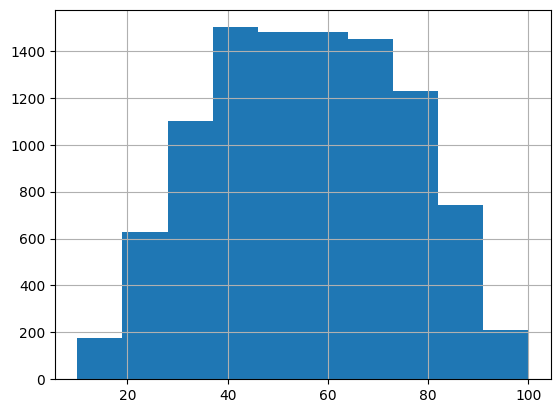

In [5]:
import matplotlib.pyplot as plt
test[Target_Feature].hist()
plt.xlabel="Students"
plt.ylabel="Perfomance"
plt.show()

In [7]:
test["Extracurricular Activities"].dtype 
test["Extracurricular Activities"] = test["Extracurricular Activities"].fillna('No')

In [8]:
activity_map = {'no': 0, 'yes': 1}

test["Extracurricular Activities"] = (
    test["Extracurricular Activities"]
        .str.strip()
        .str.lower()
        .map(activity_map)
)

test = test.fillna(test.median(numeric_only=True))
test = test.fillna('missing value')


In [9]:
test.fillna(test.median(numeric_only=True))
test.fillna('missing value')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [10]:
y=test[Target_Feature]
x_features=test.drop(columns=[Target_Feature])

XT,XV,YT,YV=train_test_split(x_features,y,test_size=0.2,random_state=42)

In [11]:
model= LinearRegression()
model.fit(XT,YT)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
preds=model.predict(XV)
rmse=np.sqrt(mean_squared_error(YV,preds))
print("Root Mean Square Error:", rmse)

Root Mean Square Error: 2.0205515085050063
